# Module 1 - Uncertainty and Entropy I

Author: Julio Correa, 2020; based on the original Matlab tutorials.<br/>
Adaptations by: J. Lizier, 2023-

The following block aims to import all the relevant libraries to analyse data

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import math

# 1. Coding Shannon information content

During our Introduction to Information Theory block, we will alter several Python functions in order to compute information-theoretic quantities.

Our first activity with these templates is to implement the Shannon information content:

$h\left(x\right)=\log_2{\left( \frac{1}{p(x)} \right)}=-\log_2 {p(x)}$

1. Edit the Python function <code>infocontent(p)</code> below to return the Shannon information content for an outcome $x$ with probability $p(x)$. Make sure that you use the function <code>np.log2()</code> rather than <code>np.log()</code> to get your answers in bits rather than nats.
    1. the value that we want is <code>-np.log2(p)</code>
    1. and we can assign this to be returned from the function by calling this from the return line: <code>return -np.log2(p)</code>


In [2]:
"""function infocontent(p)
Computes the Shannon information content for an outcome x of a random variable
X with probability p.

Inputs:
- p - probability to compute the Shannon info content for

Outputs:
- result - Shannon info content of the probability p

Copyright (C) 2020-, Julio Correa, Joseph T. Lizier
Distributed under GNU General Public License v3
"""

def infocontent(p):
    
    # Alter the equation below to provide the correct Shannon information 
    # content:

    return -np.log2(p)

2. To evaluate a function in Python, we type it's name with an appropriate argument supplied in brackets. For example, to evaluate the Shannon information content with our function for an outcome with had probability 0.2, you would call:
<code>infocontent(0.2)</code>
If you want to see the output printed to the screen, then enclose this in a <code>print</code> function:
<code>print(infocontent(0.2))</code>

    Compute the following using your function:
    - h(heads) for a fair coin?
    - h(1) for a 6-sided die? h(not 1) for a 6-sided die?
    - h(1) for a 20-sided die? h(not 1) for a 20-sided die?

In [3]:
# h(heads) for a fair coin?
print(infocontent(0.5))
# h(1) for a 6-sided die?
print(infocontent(1/6))
# h(not 1) for a 6-sided die?
print(infocontent(5/6))
# h(1) for a 20-sided die?
print(infocontent(1/20))
# h(not 1) for a 20-sided die?
print(infocontent(19/20))

1.0
2.584962500721156
0.2630344058337938
4.321928094887363
0.07400058144377693


3. Reproduce the plot below of $h(x)$ versus $p(x)$ using the matlibplot <code>plot()</code> function.

    Hints:
    1. Input <code>p</code> to <code>infocontent(p)</code> as a vector across the range <code>p = np.arange(0.01,1.001,0.01)</code>.
    2. Make an inline plot with matplotlib by calling <code>plt.plot(x, y)</code>, with <code>p</code> and <code>infocontent(p)</code>

<div>
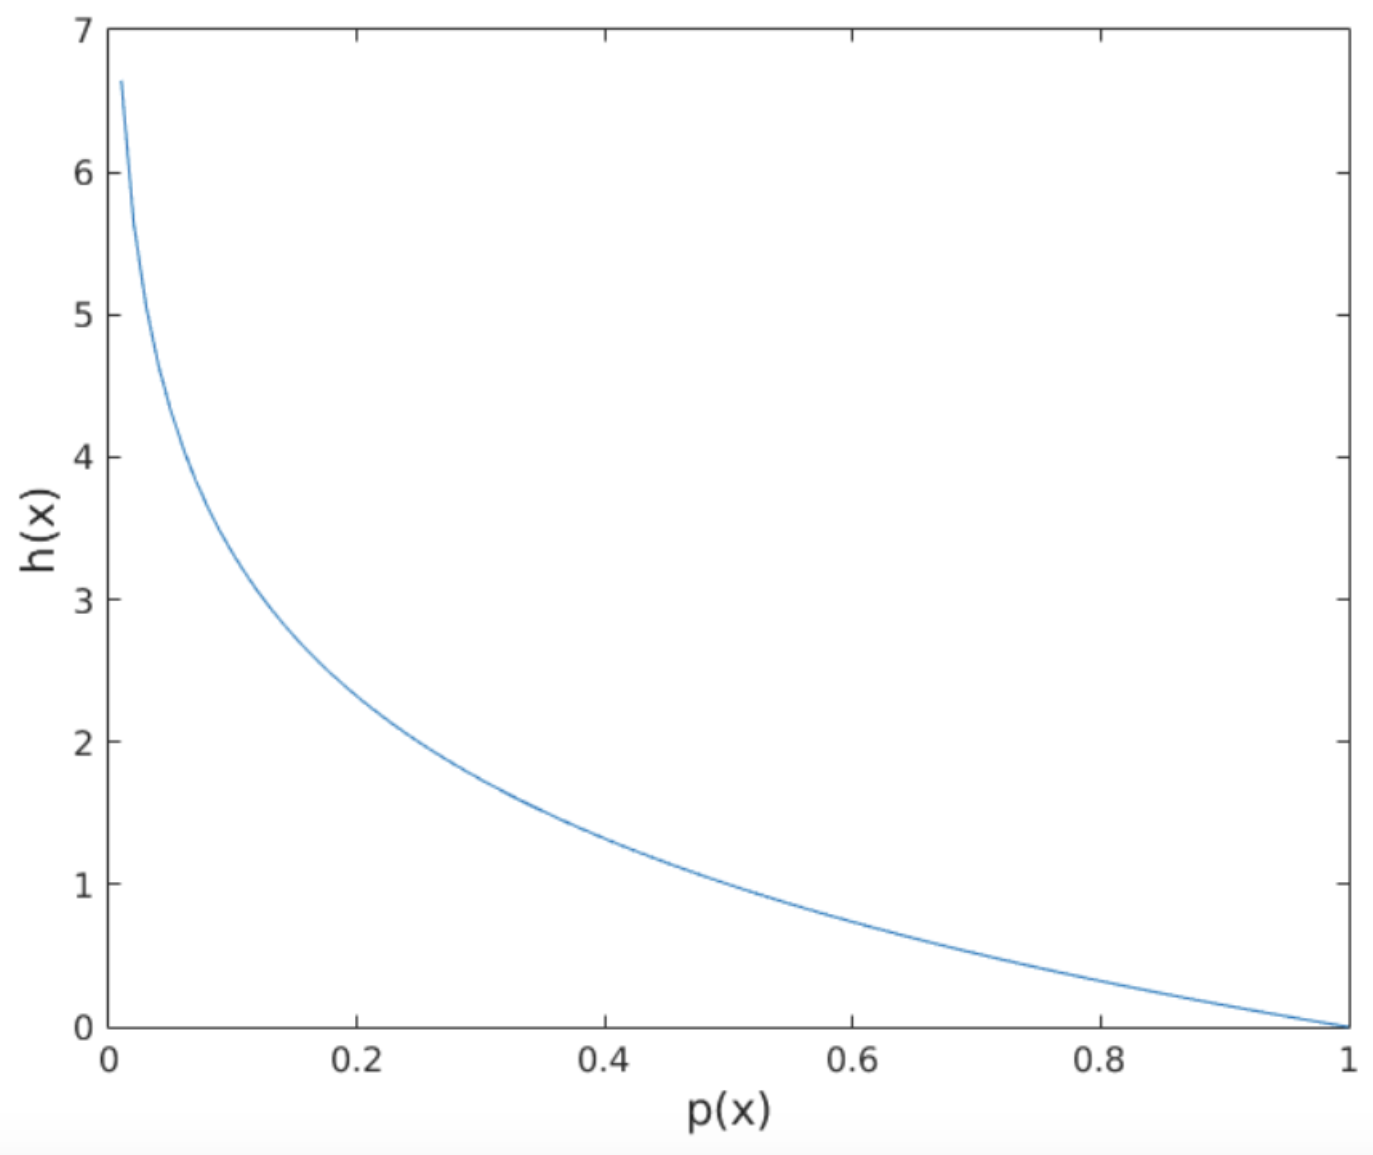
</div>


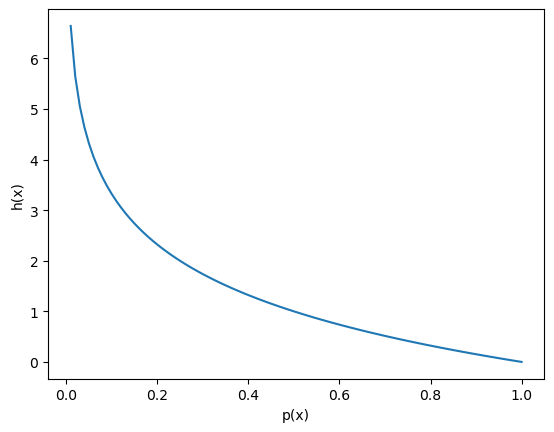

In [4]:
# Define the array for p
p = np.arange(0.01,1.001,0.01);
# Compute the infocontent() of the array p
# Make the plot and don't forget to label axes
plt.plot(p, infocontent(p))
plt.xlabel('p(x)');
plt.ylabel('h(x)');

4. Have a look at the characters that we could play Guess Who? with on the [Kooky characters sheet](https://web.archive.org/web/20170215034006/http://www.hasbro.com/upload/guesswho/GWc_Kooky-en_GB.pdf). Assuming that your partner selects one of these characters at random, compute the probability and then the Shannon information content of their character:
    1. being Jason?
    2. having one eye?
    3. having more than one eye?

In [5]:
# h(Jason)?
print(infocontent(1/24))
# h(one eye)?
print(infocontent(5/24))
# h(more than one eye)?
print(infocontent(19/24))

4.584962500721156
2.263034405833794
0.33703498727757075


5. Based on those answers, reflect on the following:
    1. Would a good first question be "does your character have one eye?" ? Why / why not?
    2. Would a good first question be "are you Jason?" ? Why / why not?

# 2. Coding Shannon entropy

In this exercise we continue to generate Python code to measure the Shannon entropy for a distribution $p(x)$:

$H(X)=-\sum_xp\left(x\right)\log_2p\left(x\right)$

Your task is to edit the Python function <code>entropy(p)</code> in the next cell to return the Shannon entropy for the given distribution $p(x)$ over outcomes $x$ of $X$.

Note the input argument to the function is a vector <code>p</code>, representing the probability mass for each outcome of $x$. That is, <code>p</code> is a vector with the $n$th entry in the vector giving the probability for the $n$th value that $x$ may take. The sum of the items in the vector <code>p</code> must be 1.

For example, for a binary $x$ we could have <b>p = np.array([0.25, 0.75])</b> where $p(x=0) = 0.25$ and $p(x=1) = 0.75$.

 - If we knew x was a binary variable, and we only took one argument, $p = p(x=1)$, how could you write one line of code to compute H(X) from p? (_Hint_: what would $log_2(p(x=1))$ be as a function of $p$? What would $log_2(p(x=0))$ be as a function of $p$? Can you combine these to give $H(X)$ ?) 

Let's assume that we don't know how many values $x$ could take, and write the code for an arbitrary length vector $p$.

1. Can you think of two ways to write the code to sum up the contribution for each item $p(x)$ in the vector $x$, being:
    1. for loop over the items of p, or<br>
    1. the sum of a vector multiplication or dot product in Python?

    Implement one of these in <code>entropy(p)</code>. (Usually the latter is faster)

2. Think of possible error conditions here, and how you can handle these in your code.

In [6]:
"""function entropy(p)
Computes the Shannon entropy for a probability distribution p.

Inputs:
- p - (array which much sum to 1) - a probability distribution to compute the Shannon info content for

Outputs:
- result - Shannon entropy of the probability distribution p
 
Copyright (C) 2020-, Julio Correa, Joseph T. Lizier
Distributed under GNU General Public License v3
"""
def entropy(p):  
    # First make sure the array is now a numpy array
    if type(p) != np.array:
        p = np.array(p)

    # Should we check any potential error conditions on the input?
    if (abs(np.sum(p) - 1) > 0.00001):
        raise Exception("Probability distribution must sum to 1: sum is %.4f" % np.sum(p))
    
    # We need to take the expectation value over the Shannon info content at
    # p(x) for each outcome x:
    weightedShannonInfos = p*(infocontent(p))
    # nansum ignores the nans from calling infocontent(0), but we still get the warning if an entry in p is zero
    return np.nansum(weightedShannonInfos)

3. Write down the answer you expect, and test that your code gives answers you expect for:
    1. <code>entropy([0.5, 0.5])</code>
    2. <code>entropy([0.25, 0.25, 0.25, 0.25])</code>
    3. <code>entropy([1, 0])</code>

In [7]:
# entropy([0.5, 0.5]) ?
print(entropy([0.5, 0.5]))
# entropy([0.25, 0.25, 0.25, 0.25]) ?
print(entropy([0.25, 0.25, 0.25, 0.25]))
# entropy([1, 0]) ?
print(entropy([1, 0]))

1.0
2.0
0.0


/tmp/ipykernel_1829157/3406804068.py:20: RuntimeWarning: divide by zero encountered in log2
  return -np.log2(p)
/tmp/ipykernel_1829157/3262277363.py:24: RuntimeWarning: invalid value encountered in multiply
  weightedShannonInfos = p*(infocontent(p))


4. _Challenge_: Plot $H(X)$ as a function of $p(x=1)$ for binary $X$. (See the plot we expect on the figure below). This will involve a loop over values of $p = p(x=1)$ to call the <code>entropy(p)</code> function with a vector corresponding to each $\{p(x=1), p(x=0)\}$ pair.

<div>
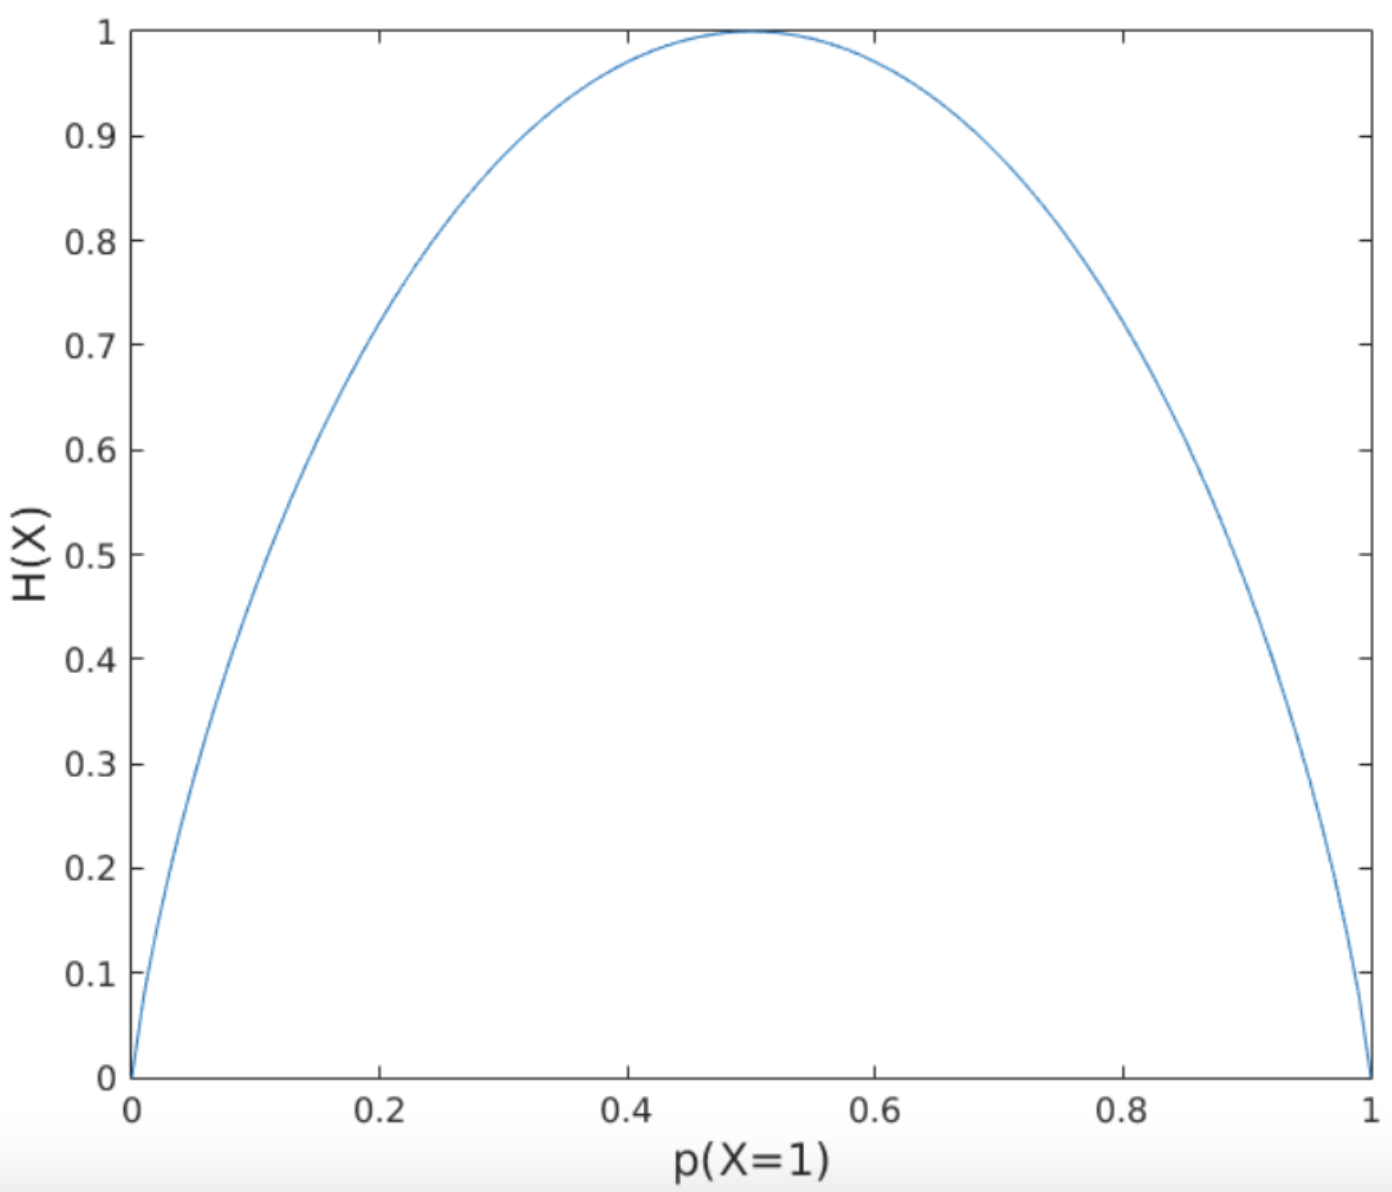
</div>


/tmp/ipykernel_1829157/3406804068.py:20: RuntimeWarning: divide by zero encountered in log2
  return -np.log2(p)
/tmp/ipykernel_1829157/3262277363.py:24: RuntimeWarning: invalid value encountered in multiply
  weightedShannonInfos = p*(infocontent(p))


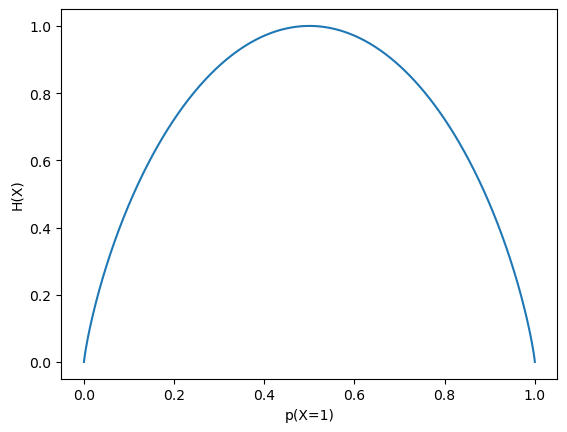

In [8]:
# Add your code to plot H(X) vs p(x=1) below
pInterval = 0.001;
numPs = (int) (1/0.001)+1;
p = np.linspace(0,1,numPs)
H = np.zeros(numPs);

for ix in np.arange(0,numPs):
    H[ix] = entropy(np.array([p[ix], 1-p[ix]]))

plt.plot(p,H)
plt.xlabel('p(X=1)');
plt.ylabel('H(X)');

5. Coming back to the characters that we could play Guess Who? with on the [Kooky characters sheet](https://web.archive.org/web/20170215034006/http://www.hasbro.com/upload/guesswho/GWc_Kooky-en_GB.pdf), validate that (using your <code>entropy</code> function):
    1. $H(who) = 4.585$ bits  (entropy of the character's identity)
    1. $H(one\ eye?) = 0.738$ bits  (entropy of whether the character has one eye or more than one eye)
    1. $H(Jason) = 0.2499$ bits  (entropy of whether the character is Jason or not)

In [9]:
# Add your code here to validate the entropies as above:
print(entropy(np.ones(24)*1/24))
print(entropy([5/24, 19/24]))
print(entropy([1/24, 23/24]))

4.584962500721156
0.7382848661434506
0.24988229283318544


6. Based on those answers and in comparison to your responses on the earlier exercise, reflect on the following:
    1. Would a good first question be _"does your character have one eye?"_ ? Why / why not?
    1. Would a good first question be _"are you Jason?"_ ? Why / why not?
    1. What is the best question to ask first that you can think of, and why? (as an optional tangent, you could watch [a video](https://youtu.be/FRlbNOno5VA) which goes into some detail about what the best questions might be -- again, think about the information-theoretic view on what is being said there)